# First neural networks
We will analize the effect of different hyperparameters on model performance using digits classification dataset

In [24]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print(f"X_train: {len(X_train)}\nX_test: {len(X_test)}")

X_train: 60000
X_test: 10000


In [5]:
X_train[0].shape

(28, 28)

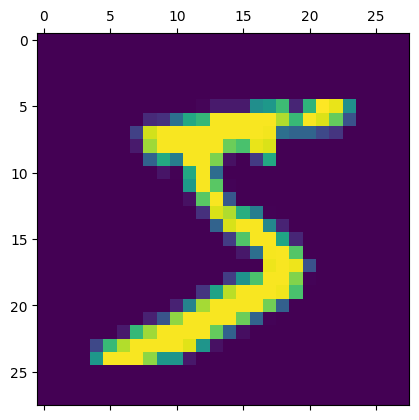

In [7]:
plt.matshow(X_train[0])

In [8]:
X_train = X_train / 255
X_test = X_test / 255

## First Model
1- 1 hidden layer with 100 neurons and relu activation function
2- optimizer = adam
3- loss = sparse_categorical_crossentropy

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2759 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1248 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0883 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0643 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0528 - accuracy: 0.9840


In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0803 - accuracy: 0.9749


[0.08031431585550308, 0.9749000072479248]

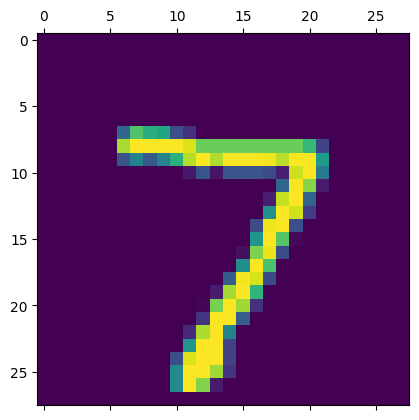

In [12]:
plt.matshow(X_test[0])

In [13]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


7

In [21]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

Text(70.72222222222221, 0.5, 'Truth')

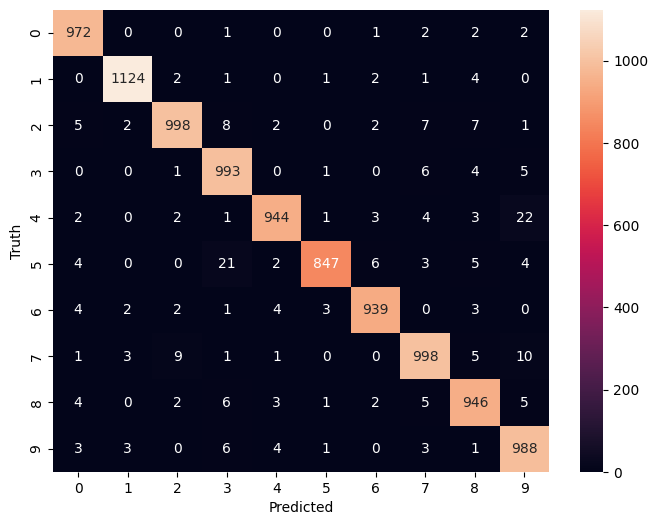

In [26]:
plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')